<a href="https://colab.research.google.com/github/msss-ethz/python_examples/blob/master/src/2DCellularAutomata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modeling and Simulating Social Systems - <font size=4 color='gray'>Leonel Aguilar</font>
# <font color='gray'>2D Cellular Automata</font>

### Import Libraries

In [1]:
import numpy as np #matrix and vector library
import matplotlib.pyplot as plt #plotting library
from random import shuffle

### Define plots to be inlined

In [2]:
#Jupyter magic that makes plots to be inlined in the notebook
%matplotlib inline 

### Create cell 

In [3]:
#Dimensions of the 2D cells space
x_dim=10 
y_dim=10
cells = np.zeros([x_dim,y_dim]) #creating empty cells
cells[0][0]=1
#cells[int(x_dim*0.8),int(x_dim*0.8)]=1 #Adding seed
#cells[int(x_dim*0.2),int(x_dim*0.2)]=1 #Adding another seed

## Create a function to plot the 2D grid of cells

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def Plot2DAutomata(cellHistory, ax=None):
    """
    Plots a 2D cellular automaton grid where:
      0 = S (red)
      1 = I (green)
      2 = R (blue)
    """
    # Create a new plot if no ax was given
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(16, 16))
    
    # Replace values to get a specific color
    minVal = 0
    maxVal = 2
    cmap = plt.cm.gray
    norm = plt.Normalize(minVal, maxVal)
    rgba = cmap(norm(cellHistory))

    # Identify state positions
    S = np.argwhere(cellHistory == 0)
    I = np.argwhere(cellHistory == 1)
    R = np.argwhere(cellHistory == 2)
    
    # Define RGB colors for states
    red = [1, 0, 0]
    green = [0, 1, 0]
    blue = [0, 0, 1]
    
    # Assign custom colors
    for position, color in zip([S, I, R], [red, green, blue]):
        for pos in position:
            rgba[pos[0], pos[1], :3] = color
    
    # Plot the matrix
    ax.imshow(rgba, origin='lower', interpolation='none')
    
    # Axis labels
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    
    # Major ticks frequency
    mTickNum = 1
    xNum = int(cellHistory.shape[0] / mTickNum)
    yNum = int(cellHistory.shape[1] / mTickNum)
         
    # Major ticks (positions)
    ax.set_xticks(np.arange(0, cellHistory.shape[0], xNum))
    ax.set_yticks(np.arange(0, cellHistory.shape[1], yNum))
    
    # Major tick labels (match number of ticks!)
    ax.set_xticklabels(np.arange(0, cellHistory.shape[0], xNum))
    ax.set_yticklabels(np.arange(0, cellHistory.shape[1], yNum))
    
    # Minor ticks (cell grid lines)
    ax.set_xticks(np.arange(-0.5, cellHistory.shape[0], 1), minor=True)
    ax.set_yticks(np.arange(-0.5, cellHistory.shape[1], 1), minor=True)
    
    # Add grid (gray lines between cells)
    ax.grid(which='minor', axis='x', color='gray', linestyle='-', linewidth=2)
    ax.grid(which='minor', axis='y', color='gray', linestyle='-', linewidth=2)

### Plot initial state

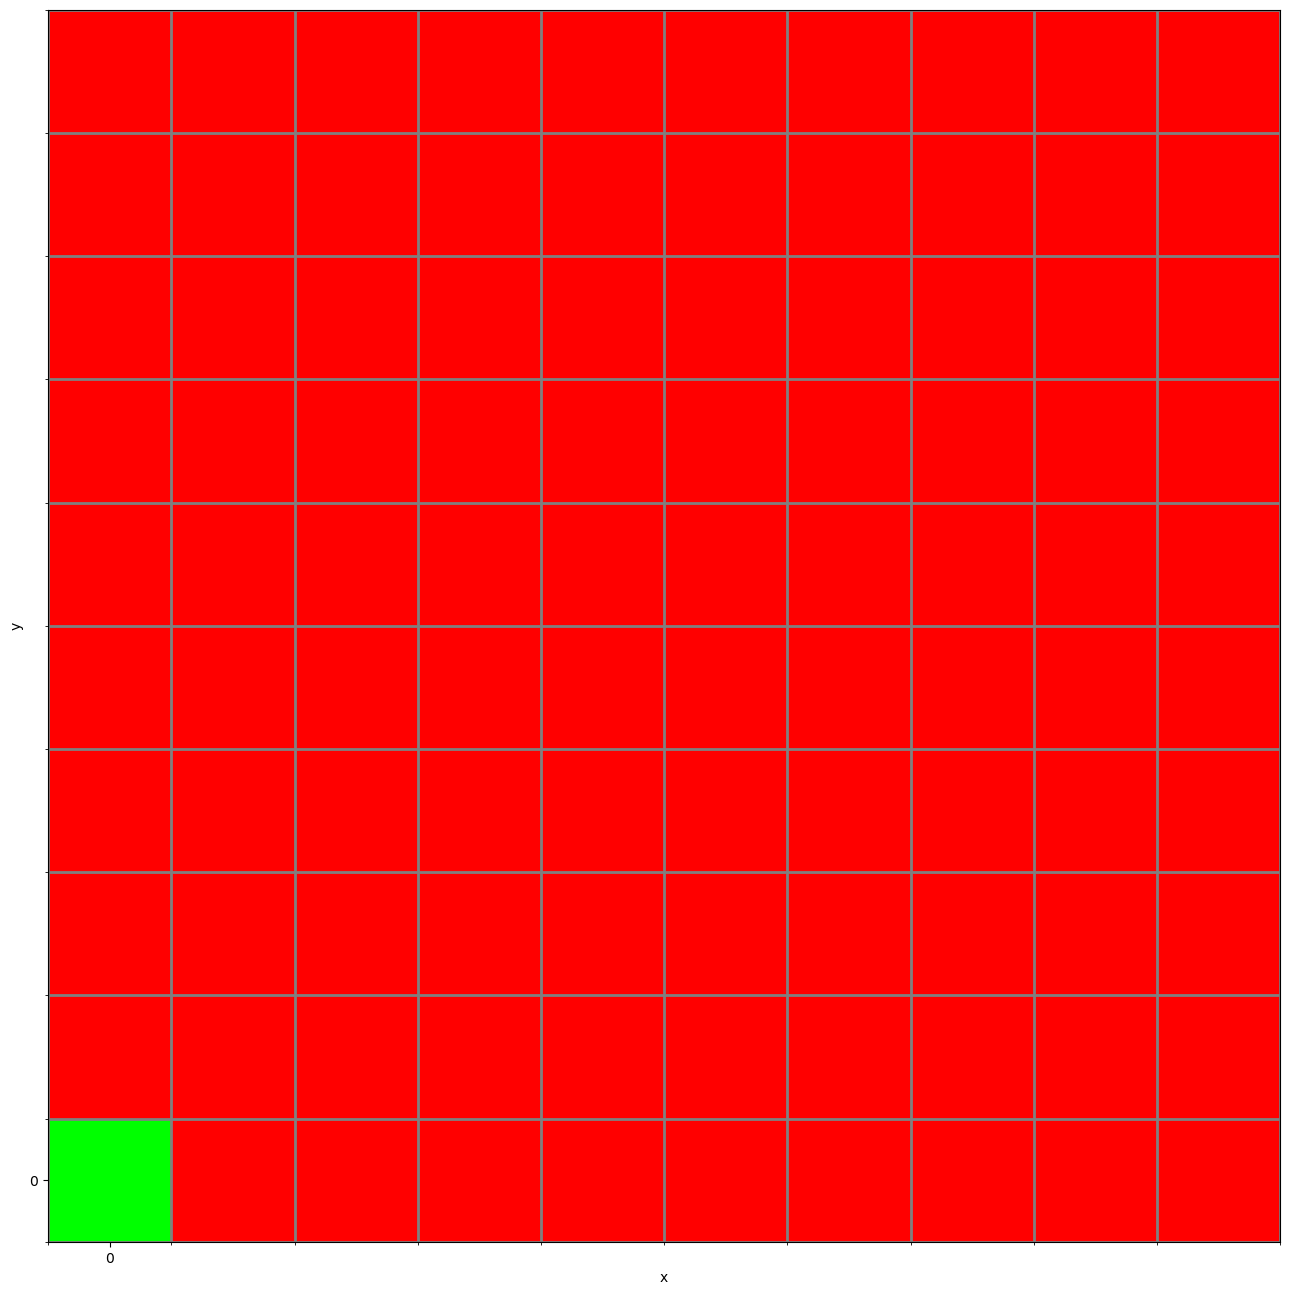

In [9]:
Plot2DAutomata(cells)
#cells.shape

### Define a function that applies the rule

In [12]:
def apply_rule(C,neighbourhood):   
    #Assumed Kermack-McKendrick SIR model
    rval=C
    beta=0.5
    gamma=0.2
    if C != 2:
        #For every neighbour it interacts with
        for val in neighbourhood:
            #The current cell gets infected with probability beta
            if val == 1:
                sample=np.random.uniform(0,1)
                if beta>sample:
                    rval=1
        #If the current cell is infected
        if C == 1:
            sample=np.random.uniform(0,1)
            #It recovers with probability gamma
            if gamma>sample:
                #print(self._gamma," --- ",sample, " --- ",self._gamma<sample)
                rval=2

    return rval

### Define Neighborhood

In [13]:
def idxToCoordinates(idx,x_dim):
    return [idx%x_dim,idx//x_dim]

def getNeighbourhood(idx,x_dim,y_dim):
    neighb=[]
    coords=idxToCoordinates(idx,x_dim)
    for j in range(-1,2,1):
        for i in range(-1,2,1):
            #Handle boundary conditions
            if coords[0]+i>=0 and coords[0]+i<x_dim and coords[1]+j>=0 and coords[1]+j<y_dim and (j!=0 or i!=0):
                neighb.append([coords[0]+i,coords[1]+j])
    return (coords,neighb)

def getNeighbourhoodValues(idx,grid,x_dim,y_dim):
    mycoords,neighCoords=getNeighbourhood(idx,x_dim,y_dim)
    
    mystate=grid[mycoords[0]][mycoords[1]]
    neighstate=[]
    for neighc in neighCoords:
        neighstate.append(grid[neighc[0]][neighc[1]])
    #print("- Coords ",mycoords," = ",mystate," neigs ",neighstate," = ",neighCoords)
    return mycoords,mystate,neighstate
    

### Define the step Function


In [14]:
def step(state):
    """Every timestep the state of the new generation of cells is determined by 
    the previous generation neighborhood
    Input: current state of all cells (state)
    Output: next state of all cells (new_state) 
    """
    all_idx = np.arange(0, x_dim*y_dim, 1)
    shuffle(all_idx)
    new_state = np.zeros([x_dim,y_dim])
    #Iterate through all cells (C) in the automata and extract its neighbourhood
    for idx in all_idx:
        #print("cell ",mycoords)
        mycoords,mystate,neighstate = getNeighbourhoodValues(idx,state,x_dim,y_dim)
        #print("cell ",idx," - ",mycoords)
        new_state[mycoords[0]][mycoords[1]] = apply_rule(mystate,neighstate)
    return new_state

### Define the simulation

In [15]:
def simulation(X,max_steps):
    """Traces the whole evolution of an initial state X through max_steps generations
    Input: X, initial state
    Output: cells_stack.transpose(), matrix stacking the cells state after each timestep 
    """
    cells_stack=[X]
    new_state=X
    #            #print(coords[0]+i," - ",coords[1]+j)Move one step forward max_step times
    for i in range(max_steps):
        #Moves one step forward
        new_state=step(new_state)
        #Stores the result
        cells_stack.append(new_state)
    return cells_stack
    

# Performing the simulation
___

In [16]:
max_steps=30 #Number of timesteps
results=simulation(cells,max_steps) #Perform simulation and store its results

## Plot results

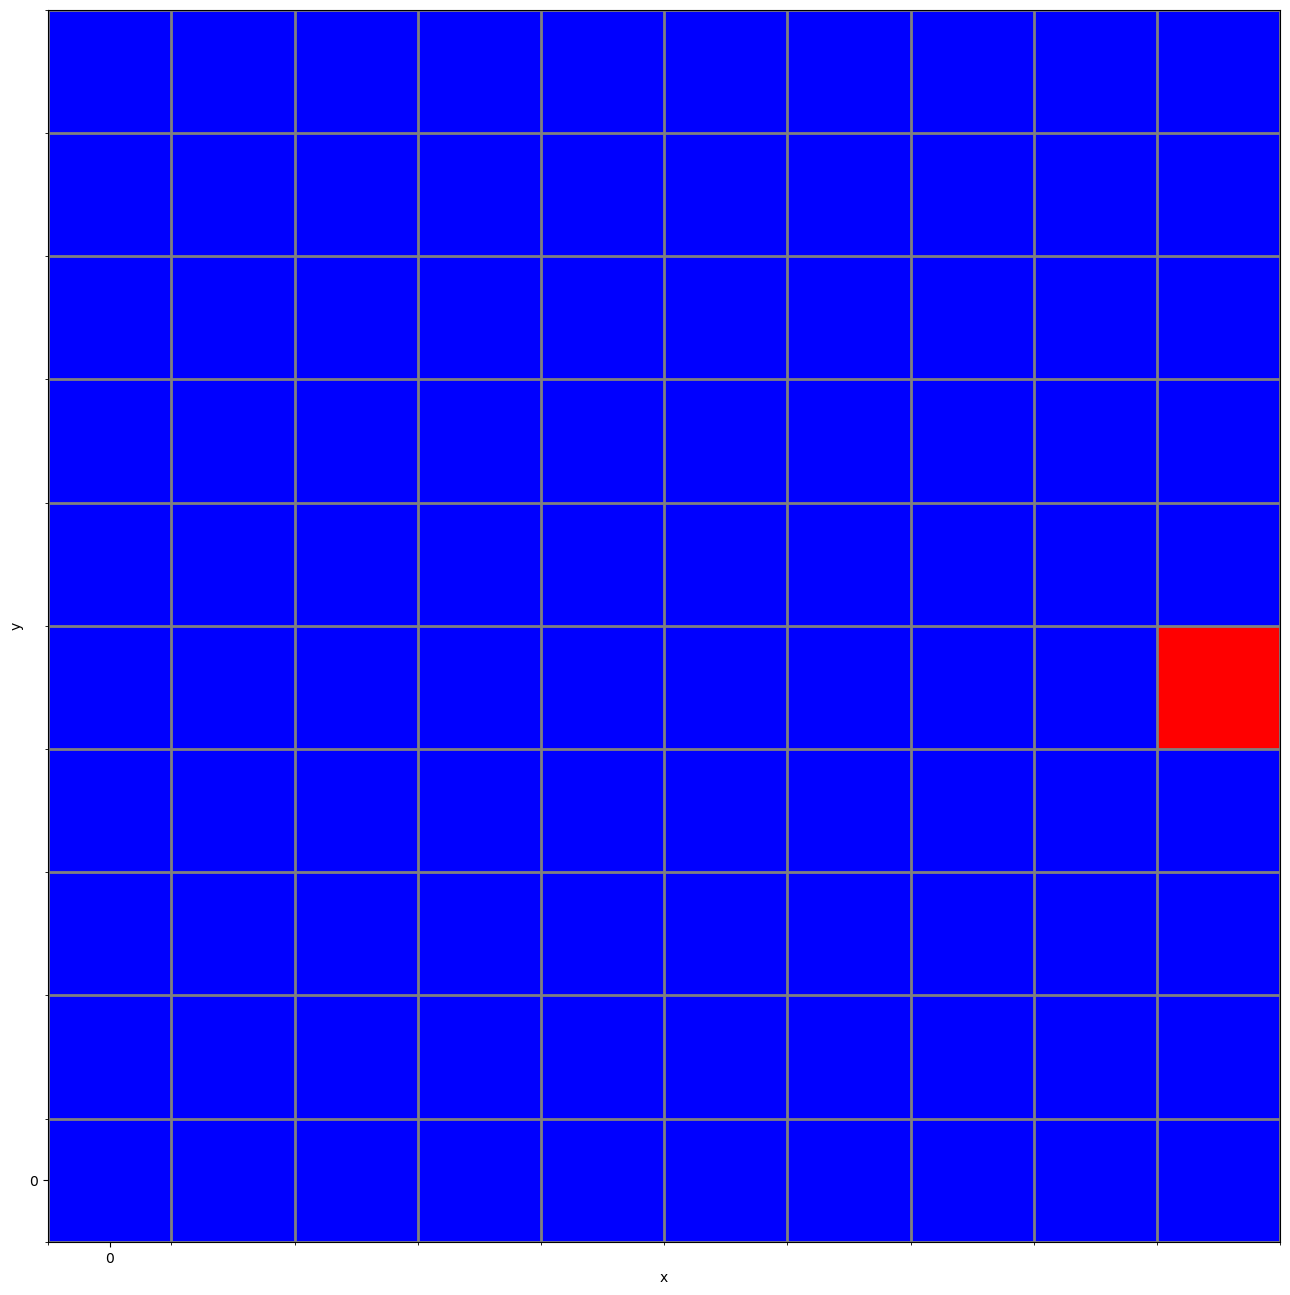

In [17]:
Plot2DAutomata(results[-1])

In [18]:
### Visualize Results

import matplotlib.animation
plt.rcParams["animation.html"] = "jshtml"
from copy import deepcopy
import pandas as pd



In [19]:
%%capture
# Build plot
fig, ax = plt.subplots(figsize=(6,4))
resultsCopy= deepcopy(results)

def animate(j):
    ax.clear()
    Plot2DAutomata(results[j],ax=ax)
    
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(results))

In [20]:
ani

In [21]:
# Set up formatting for the movie files
Writer = matplotlib.animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Leo'), bitrate=1800)
ani.save('2DCA.mp4', writer=writer)

In [22]:
stacked=[result.flatten() for result in results]

In [23]:
df = pd.DataFrame(stacked)

In [24]:
S = df[df==0].count(axis='columns')
I = df[df==1].count(axis='columns')
R = df[df==2].count(axis='columns')

In [25]:
x = np.arange(0.0, max_steps+1, 1)

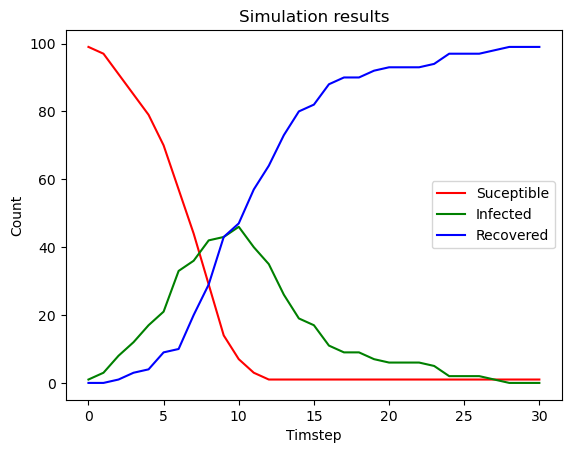

In [26]:
plt.plot(x,S,'red', label='S')
plt.plot(x,I,'green', label='I')
plt.plot(x,R,'blue', label='R')
plt.xlabel('Timstep')
plt.ylabel('Count')
plt.title('Simulation results')
plt.legend(['Suceptible','Infected','Recovered'])
plt.show()